<a href="https://colab.research.google.com/github/Alekhy19/dl-hw1/blob/main/Alekhya_DL_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

from numpy import argmax
from keras.models import load_model

from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import mnist

In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
trainY.shape

(60000,)

In [6]:
testX.shape

(10000, 28, 28)

In [7]:
testY.shape

(10000,)

In [8]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [9]:
trainX = trainX/ 255.0
testX = testX/ 255.0

In [10]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.25, random_state= 8) 

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28, 28)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile modeltten
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(valX, valY))

Epoch 1/5
1407/1407 [==============================] - 112s 78ms/step - loss: 0.0433 - accuracy: 0.9334 - val_loss: 0.0227 - val_accuracy: 0.9657
Epoch 2/5
1407/1407 [==============================] - 101s 72ms/step - loss: 0.0180 - accuracy: 0.9739 - val_loss: 0.0179 - val_accuracy: 0.9733
Epoch 3/5
1407/1407 [==============================] - 101s 72ms/step - loss: 0.0123 - accuracy: 0.9836 - val_loss: 0.0173 - val_accuracy: 0.9739
Epoch 4/5
1407/1407 [==============================] - 103s 73ms/step - loss: 0.0090 - accuracy: 0.9892 - val_loss: 0.0160 - val_accuracy: 0.9769
Epoch 5/5
1407/1407 [==============================] - 99s 70ms/step - loss: 0.0069 - accuracy: 0.9920 - val_loss: 0.0153 - val_accuracy: 0.9790


In [15]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.100


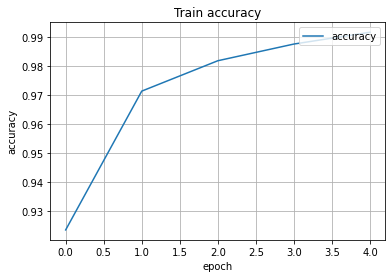

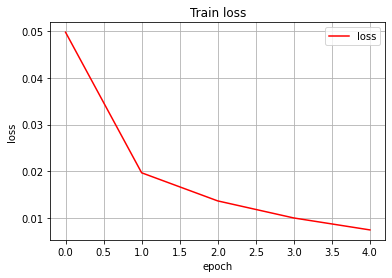

In [ ]:
## 2.(i)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper right')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], color='red')
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.grid()
plt.show()

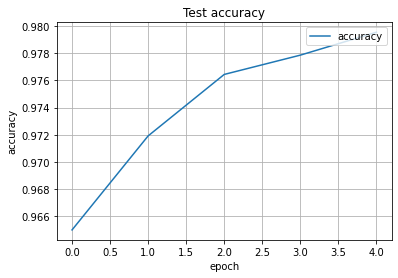

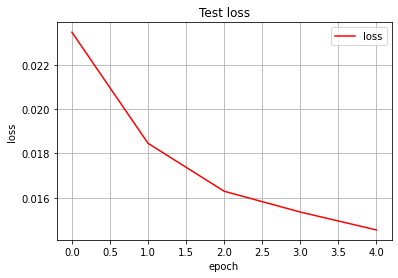

In [ ]:
## 2.(ii)
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper right')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'], color='red')
plt.title('Test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
#prediction
index = random.randint(0,10)
img = testX[index]
img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
img = img.astype('float32')
img = img / 255.0

predict_value = model.predict(img)
digit = argmax(predict_value)

print('The predicted outcome from the model is: ', digit)

1/1 [==============================] - 0s 151ms/step
The predicted outcome from the model is:  5


https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
